<!-- <img src="./images/aims-za-logo.jpeg" alt="drawing" style="width:400px;"/> -->
<h1 style="text-align: center;"><a title="EMS-AIMS-ZA-2024-25" href="https://evansdoe.github.io/aims-za/ems/2024-25">Experimental Mathematics Using SageMath — AIMS-ZA-2024-25</a></h1>


## Instructors: 

* <a href="http://evansdoe.github.io">**Evans Ocansey**</a>

## Homework Assignment (due Saturday 16th November 2024, 13:00 GMT+2)  <a class="anchor" id="homework-assignment-02"></a>


Instructions for homework assignments: 
- Make sure to rename this notebook by replacing the word `username` with your AIMS username. For example, if my name is `Evans`, then I will rename this notebook to be `ems_2024_25_assignment_02_evans`.
- You must write, type, use Jupyter notebook, or use $\LaTeX$ to submit homework. **ALL CODE MUST BE EXPLAINED**. That means you should have at least one English sentence to explain each line of code that you write. This may be in a form of a comments or in a paragraph after each computation in your upyter notebook.
- Similarly, do not simply write your explorations as lists of numbers, but write explanations of what you tried, and what didn’t work.
- Do **NOT** use internet resources, or GPT-like models for the exploration; for help with _SageMath_ or _Python_ you may search the internet, of course. You are also welcome to ask me or any of the tutors.
- The starred (*) exercises are more important; you should be working on them early and often. To pass the course you should try to do all the starred exercises.

The outline of this notebook is as follows:

## Table of Contents: <a class="anchor" id="assignment-01-toc"></a>
* [<font color=green>Exercise 01</font>](#exercise-01)
* [<font color=green>Exercise 02</font>](#exercise-02)
* [<font color=green>Exercise 03</font>](#exercise-03)
* [<font color=green>Exercise 04</font>](#exercise-04)
* [<font color=green>Exercise 05</font>](#exercise-05)
* [<font color=green>Exercise 06</font>](#exercise-06)
* [<font color=green>Exercise 07</font>](#exercise-07)
* [<font color=green>Exercise 08</font>](#exercise-08)
* [<font color=green>Exercise 09</font>](#exercise-09)
* [<font color=green>Exercise 10</font>](#exercise-10)
* [<font color=green>Exercise 11</font>](#exercise-11)
* [<font color=green>Exercise 12</font>](#exercise-11)

## <font color=green>Exercise 01</font> <a class = "anchor" id="exercise-01"></a>

(*) Pick one of the following topics or any topic of your interest. Write a small tutorial (in English) about this topic to introduce a beginner to doing this topic with Sage. You should use your own words and it should have at least three paragraphs, along with at least four longer Sage examples. 

# Probability theory

## Introduction

What we are faced with is a coupon collection problem in a game where each box of cereal contains one of ten coupons, each with the same probability. We win a prize if we manage to obtain a complete collection of all the different coupons. How many boxes do we have to buy? For example, suppose we draw the following coupons, in order: \
$5, 2,3, 7, 5, 1, 1, 4, 8, 1, 9, 10, 2, 3, 3, 6$. \
With the last coupon (6), we have completed our collection, and so we stop (after about 17 steps).

## Sage Implementation of The Problem

In [1]:

def Draw_C(n, k):
    return choice(range(n + k)) 

def Draw_to_all_types(n, k):
    new_coupon = []
    N_collected = 0  
    total_try = 0
    while N_collected < n:  
        coupon = Draw_C(n, k)
        if coupon < n and coupon not in new_coupon:  
            new_coupon.append(coupon)
            N_collected += 1
        total_try += 1
    return total_try
    
def Mainf(n, k, N):
    Sum_trials = 0
    for i in range(N):
        Sum_trials += Draw_to_all_types(n, k)
    return Sum_trials / N


# average_trials = Mainf(10, 1, 100000)
# print(f"Average number of trials to collect all 10 types with 1 neutral types:{float(average_trials)}")
def find_min_k_for_average(n, target_average, N):
    k = 0  # Start with no neutral coupons
    while True:
        current_average = Mainf(n, k, N)
        print(f" k={k}: Average trials = {float(current_average)}")  # Optional: for debugging
        if current_average >= target_average:
            return k
        k += 1  # Increment k and try again

n = 10  
target_average = 35
N = 100000  
min_k = find_min_k_for_average(n, target_average, N)



 k=0: Average trials = 29.3111
 k=1: Average trials = 32.22096
 k=2: Average trials = 35.1637


**Mathematical justification**

Let $X$ be the random variable representing the number of purchases that a customer needs to make until acquiring all $ n $ types of necessary coupons. For each $ i $ in the set $ \{1, 2, \dots, n\} $, define $ x_i $ as the random variable representing the number of purchases required to obtain a new type of coupon, given that $ i-1 $ different types have already been collected. Thus, the total number of purchases $ X $ needed to collect all $ n $ types is given by:
$$ X = x_1 + x_2 + \dots + x_n. $$

When considering $ k $ distinct coupons in addition to the $ n $ necessary ones, probability $ P_i $ of obtaining a new necessary type on any given purchase, when $ i-1 $ types have already been collected, is:
$$ P_i = \frac{n - (i-1)}{n + k}, $$
where $ n - (i-1) $ unacquired necessary coupons, $ n + k $ is total number of different coupon available.
We can see this problem follows a Geometric distrubtion with parameter $ p $ being the probability of get a `success at k` given there was `k-1 failures`

Therefore, we have:
   - $x_i$ follows a geometric distribution with the parameter 
$p_i = \frac{n-(i-1)}{n}$ 

   - $E(x_i) = \frac{1}{p_i} = \frac{n}{n-(i-1)}$
and hence the average number of boxes 


$$ E[X] = E[x_1] + \cdots + E[x_n] $$ 

$$ \frac{n}{n} + \frac{n}{n-1} + \frac{n}{n-2} + \cdots + \frac{n}{2} + n$$
$$ n \sum_{i=1}^{n} \frac{1}{i}$$

The expected number of boxes $E(X)$ needed to collect all $n$ coupons is given by:
$$
E(X) = n \cdot H_n
$$
where $H_n$ is the $n$-th harmonic number. The harmonic number $H_n$ is defined as:
$$
H_n = \sum_{i=1}^{n} \frac{1}{i}
$$

$$
H_{n} =\frac{1}{n} + \frac{1}{n-1} + \frac{1}{n-2} + \cdots + \frac{1}{2} + 1
$$\
$E(X) = n \cdot H_n = 10(2.9)= \textbf{29} \, \text{boxes}$ 


For large value of n $H_n \approx \ln{n} + \gamma $: where $\gamma$ is the **Euler–Mascheroni (0.577215665)**

`In conclusion for U= 10 distinct coupons we need an average of 29 boxes`

## The Fundamental Theorem of Arithmetic  
The Fundamental Theorem of Arithmetic states that for any integer $ n > 1 $ , $ n $ can be uniquely expressed as a product of prime numbers, disregarding the order of the factors.

A prime number $ p $ is defined as a number greater than 1 that has no positive divisors other than 1 and itself.

To prove the theorem,we need to note te following:

**Lemma 1:** Every integer $ n > 1 $ is either a prime number or a product of primes.  
*Proof:* Induction on $ n $. The base case $ n = 2 $ holds. Assume true for all $ k < n $. If $ n $ is not prime, it has a divisor $ d $ such that $ 1 < d < n $. By the induction hypothesis, both $ m $ and $ d $ can be expressed as products of primes, thus $ n $ can too.

**Lemma 2:** If a prime $ p $ does not divide $ a $, then $ \operatorname{gcd}(p, a) = 1 $.  
*Proof:* Let $ d = \operatorname{gcd}(p, a) $. Since $ p $ is prime, $ d $ is either 1 or $ p $. The assumption $ p \nmid a $ leads to $ d = 1 $.

**Lemma 3:** If a prime $ p $ divides $ ab $, then $ p \mid a $ or $ p \mid b $.  
*Proof:* Assume $ p \nmid a $. By Lemma 2, $ \operatorname{gcd}(p, a) = 1 $. By the Euclidean algorithm, we establish $ p \mid b $. For the general case, apply induction on $ n $.

**Theorem:** Every integer $ n > 1 $ has a unique prime factorization.  
*Proof:* Induction on $ n $. Base case $ n = 2 $ is clear. Assume true for integers $ 1 < k < n $. If $ n $ is prime, we have nothing more to prove. If $ n $ is composite with two factorizations: 

$$
n = p_1 p_2 \cdots p_s = q_1 q_2 \cdots q_t
$$

By Lemma 3, $ p_1 $ divides one of the $ q_j $, which allows us to show that all $ p_i $ and $ q_j $ must be the same, completing the proof.

The prime factorization can be expressed as:

$$
n = p_1^{\alpha_1} p_2^{\alpha_2} \cdots p_k^{\alpha_k}
$$

where $ \alpha_i $ represents the exponent of prime $ p_i $.

\section*{Corollary}  
The positive divisors of $ n $ can be represented as:

$$
d = \prod_{i=1}^k p_i^{\beta_i}
$$

where $ 0 \leq \beta_i \leq \alpha_i $, and the number of positive divisors is given by:

$$
\tau(n) = (1 + \alpha_1)(1 + \alpha_2) \cdots (1 + \alpha_k)
$$

## Proof of $\sigma(n)$

The divisors of $n$ can be written as $ p_1^{a_1} p_2^{a_2} \cdots p_k^{a_k} $ where $0 \leq a_i \leq e_i$. The sum of divisors of $n$ includes all possible products $ p_1^{a_1} p_2^{a_2} \cdots p_k^{a_k} $.

The sum of the divisors contributed by each prime $p_i$ is the geometric series sum:


$$
1 + p_i + p_i^2 + \cdots + p_i^{e_i} = \frac{p_i^{e_i+1} - 1}{p_i - 1}
$$



Thus, the sum of all divisors of $n$ is the product of these sums:


$$
\sigma(n) = \left( \frac{p_1^{e_1+1} - 1}{p_1 - 1} \right) \left( \frac{p_2^{e_2+1} - 1}{p_2 - 1} \right) \cdots \left( \frac{p_k^{e_k+1} - 1}{p_k - 1} \right)
$$

## <font color=green>Exercise 02</font> <a class = "anchor" id="exercise-02"></a>  

(*) Make a complicated plot, with the following criteria.  
It should have at least three separate plots you combine, one of which is not just plotting a function (it could be data, implicit, a shape, etc.).

You should use at least TEN different optional graphics keywords properly (and meaningfully).

As usual, explain what you did!

For a bonus, you can animate it (the animation must be meaningful, though). See the Sage function animate. You can also read the help file [here](https://doc.sagemath.org/html/en/reference/plotting/sage/plot/animate.html).



In [1]:
@interact
def _(frame=checkbox(True, label='Use frame')):

    # Define the function and its third derivative
    fx = sin(x)
    deriv_3 = diff(fx, x, 3)
    
    # Plot the sine function
    plot1 = plot(fx, (x, -pi, 3*pi), axes_labels=['$x$', '$y$'], legend_label='$sin(x)$', show_legend=True)
    
    # Plot the third derivative
    plot2 = plot(deriv_3, (x, -pi, 3*pi), linestyle="--", color="red", axes_labels=['$x$', '$y$'], legend_label="$f'''(x)$", show_legend=True)
    # Plotiing the function sin(x^2)/x^2
    plot3 = plot(sin(x^2)/(x^2), x, -3, 10, fill='axis', linestyle="-.", color="green", axes_labels=['$x$', '$y$'], legend_label="$(sin(x^2)/(x^2))$", show_legend=True)
    # Combine the plots and set the y-axis limits
    combined_plot = plot1 + plot2 + plot3
    combined_plot.show(ymin=-2, ymax=2, ticks=pi/4, tick_formatter=pi,frame=frame)

Interactive function <function _ at 0x7f7c4df30180> with 1 widget
  frame: Checkbox(value=True, description='Use frame')

## <font color=green>Exercise 03</font> <a class = "anchor" id="exercise-03"></a>  

(*) Write up your code and explorations of $n=a^2+b^2$.  I want to know all the patterns you found.  Do you have any ideas about formulas?  You can discuss prime numbers, remainders/modulo, the number of ways to write $n$ in this form, geometric insights, or anything else.  Show your creativity!  Also explain what you did; do not just give results.

In [2]:
def sum_of_squares_data(a_bound=6, b_bound=6):
    """Here we are trying to generate some data and store it
    We are going to store our data in form of a dictionary 
    """
    sum_of_squares_database = {} #Database to store our rxperiment results
    for a in [0..a_bound]:
        for b in [0..b_bound]:
            n = a^2 + b^2  # The experiment we are having itself
            if n not in sum_of_squares_database:
                sum_of_squares_database[n] = [(a, b)]
            else:
                sum_of_squares_database[n].append((a,b))
    return sum_of_squares_database


In [3]:
a_bound=20
b_bound=20

sum_of_squares_database = sum_of_squares_data(a_bound=a_bound, b_bound=b_bound) # Here we csll our fumction and create a database that we will later use to querry
exp1 ={key: sum_of_squares_database[key] for key in list(filter(is_odd, sum_of_squares_database))} # Querrying for the Odd numbers (n) from the database

In [4]:
odd_even = lambda tup: (is_odd(tup[0]) and is_even(tup[1])) or (is_even(tup[0]) and is_odd(tup[1])) # Querrying in the database based on the values of a and b that are 1 odd and 1 even
all_odd_even = all(all(odd_even(tup) for tup in value) for value in exp1.values())
all_odd_even #The created DataBase 

True

In [5]:
# Lambda function to check if both elements of the tuple are less than the square root of the key
ab_less_sqrt_n = lambda tup, key: (tup[0] <= sqrt(key)) and (tup[1] <= sqrt(key))

# Check all values in sum_of_squares_database
all(all(ab_less_sqrt_n(tup, key) for tup in value) for key, value in sum_of_squares_database.items())

True

In [6]:
# This is for me to check if the length any given numbers 
pairs = {n: pairs for n, pairs in sum_of_squares_database.items() if len(pairs)>4}; pairs

{325: [(1, 18), (6, 17), (10, 15), (15, 10), (17, 6), (18, 1)],
 425: [(5, 20), (8, 19), (13, 16), (16, 13), (19, 8), (20, 5)]}

In [7]:
pairs_four = {n: pairs for n, pairs in sum_of_squares_database.items() if len(pairs)==4}
divisible_byfive = lambda divisible_byfive: divisible_byfive %5
all(map(divisible_byfive, pairs_four.keys()))

False

In [8]:
primes = {key: sum_of_squares_database[key] for key in list(filter(is_prime , sum_of_squares_database))}; del primes[2]
len_pair_ab = lambda len_pair_ab: len(len_pair_ab)==2
all(map(len_pair_ab, primes.items()))


True

In [9]:
perfect_n ={key: [tup for tup in value if tup[0] == tup[1]] for key, value in sum_of_squares_database.items()}
# Lambda function to check if both elements of the tuple are less than the square root of the key
perfect = lambda tup, key: (2*tup[0]^2 == key) and (2*tup[1]^2 == key)

# Check all values in sum_of_squares_database
all(all(perfect(tup, key) for tup in value) for key, value in perfect_n.items())

True

 Conjecture  | Is it True or False?
------------- | -------------
If $n$ is odd, then the pair $(a,b)$ has one to be even and the other odd. | $\color{green}{\text{True}} $
If $a$ and $b$ are both even, then $n$ is even and if $a$ and $b$ are both odd, then $n$ is even.|$\color{green}{\text{True and trivial result}} $
If $n=a^2+b^2$ for $a,b\in\mathbb{N}$ then $a,b\leq\sqrt{n}$ |$\color{green}{\text{True and Trivial}} $
If $n=a^2+b^2$ for $a,b\in\mathbb{N}$, then the maximum number of pairs $(a,b)$ for fixed $n$ is equal to 4.| $\color{red}{\text{False (shown by counter example)}} $
If $n$ has 4 pairs of solution, then $n$ is a multiple of $5$.| $\color{red}{\text{False (shown by counter example)}} $
If $n$ is prime and $>2$, the number of $(a,b)$ is always 2.|$\color{green}{\text{True}} $
If $a=b$, $n=2a^2$ or $n=2b^2$. If a or b is equal to zero, then $n=a^2$ or $b^2$.|$\color{green}{\text{True}} $
If $n$ is a perfect square, the number of $(a,b)$ is 2.| $\color{red}{\text{False (shown by counter example)}} $
If $n$ is an odd prime and can be written as 1 mod 4, then it can be written as $a^2+b^2$.| $\color{green}{\text{True}} $

## <font color=green>Exercise 04</font> <a class = "anchor" id="exercise-04"></a>  

(*) Investigate one other (binary) quadratic form that you have picked.  Explore it in the same way as the previous one.  Tell me about all the patterns you found, just like in the previous question.  Are there any interesting equivalent quadratic forms you found?

# $n= x^2-y^2$

In [10]:
def sum_of_squares_update(a_bound=6, b_bound=6):
    """Here we are trying to generate some data and store it
    We are going to store our data in form of a dictionary 
    """
    sum_of_squares_database_update = {}
    for a in [0..a_bound]:
        for b in [0..b_bound]:
            n = a^2 -b^2 
            if n not in sum_of_squares_database_update:
                sum_of_squares_database_update[n] = [(a, b)]
            else:
                sum_of_squares_database_update[n].append((a,b))
    return sum_of_squares_database_update

In [29]:
a_bound=20
b_bound=20

sum_of_squares_database_update = sum_of_squares_update(a_bound=a_bound, b_bound=b_bound) # Here we csll our fumction and create a database that we will later use to querry
exp2 ={key: sum_of_squares_database_update[key] for key in list(filter(is_odd, sum_of_squares_database_update))} # Querrying for the Odd numbers (n) from the database

In [30]:
sum_of_squares_database_update

{0: [(0, 0),
  (1, 1),
  (2, 2),
  (3, 3),
  (4, 4),
  (5, 5),
  (6, 6),
  (7, 7),
  (8, 8),
  (9, 9),
  (10, 10),
  (11, 11),
  (12, 12),
  (13, 13),
  (14, 14),
  (15, 15),
  (16, 16),
  (17, 17),
  (18, 18),
  (19, 19),
  (20, 20)],
 -1: [(0, 1)],
 -4: [(0, 2)],
 -9: [(0, 3), (4, 5)],
 -16: [(0, 4), (3, 5)],
 -25: [(0, 5), (12, 13)],
 -36: [(0, 6), (8, 10)],
 -49: [(0, 7)],
 -64: [(0, 8), (6, 10), (15, 17)],
 -81: [(0, 9), (12, 15)],
 -100: [(0, 10)],
 -121: [(0, 11)],
 -144: [(0, 12), (5, 13), (9, 15), (16, 20)],
 -169: [(0, 13)],
 -196: [(0, 14)],
 -225: [(0, 15), (8, 17)],
 -256: [(0, 16), (12, 20)],
 -289: [(0, 17)],
 -324: [(0, 18)],
 -361: [(0, 19)],
 -400: [(0, 20)],
 1: [(1, 0)],
 -3: [(1, 2)],
 -8: [(1, 3)],
 -15: [(1, 4), (7, 8)],
 -24: [(1, 5), (5, 7)],
 -35: [(1, 6), (17, 18)],
 -48: [(1, 7), (4, 8), (11, 13)],
 -63: [(1, 8), (9, 12)],
 -80: [(1, 9), (8, 12)],
 -99: [(1, 10), (15, 18)],
 -120: [(1, 11), (7, 13), (13, 17)],
 -143: [(1, 12)],
 -168: [(1, 13), (11, 17)],
 -

In [31]:
odd_even = lambda tup: (is_odd(tup[0]) and is_even(tup[1])) or (is_even(tup[0]) and is_odd(tup[1])) # Querrying in the database based on the values of a and b that are 1 odd and 1 even
all_odd_even = all(all(odd_even(tup) for tup in value) for value in exp2.values())
all_odd_even #The created DataBase 

True

In [32]:
# Check all values in sum_of_squares_database
# Lambda function to check if both elements of the tuple are less than the square root of the key
ab_less_sqrt_n = lambda tup, key: (tup[0] <= sqrt(key)) and (tup[1] <= sqrt(key))

# Check all values in sum_of_squares_database


all(all(ab_less_sqrt_n(tup, key) for tup in value) for key, value in sum_of_squares_database_update.items())

False

In [19]:
# This is for me to check if the length any given numbers 
pairs = {n: pairs for n, pairs in sum_of_squares_database_update.items() if len(pairs)>4}; pairs

{0: [(0, 0),
  (1, 1),
  (2, 2),
  (3, 3),
  (4, 4),
  (5, 5),
  (6, 6),
  (7, 7),
  (8, 8),
  (9, 9),
  (10, 10),
  (11, 11),
  (12, 12),
  (13, 13),
  (14, 14),
  (15, 15),
  (16, 16),
  (17, 17),
  (18, 18),
  (19, 19),
  (20, 20)]}

This is noted that for the `key 0:` we can see that it has an $\infty$ set of combinations where $a=b$

In [20]:
pairs_four = {n: pairs for n, pairs in sum_of_squares_database_update.items() if len(pairs)==4}
divisible_byfive = lambda divisible_byfive: divisible_byfive %5
all(map(divisible_byfive, pairs_four.keys()))

True

In [22]:
primes = {key: sum_of_squares_database_update[key] for key in list(filter(is_prime , sum_of_squares_database_update))}
len_pair_ab = lambda len_pair_ab: len(len_pair_ab)==2
all(map(len_pair_ab, primes.items()))

True

In [23]:
perfect_n ={key: [tup for tup in value if tup[0] == tup[1]] for key, value in sum_of_squares_database_update.items()}
# Lambda function to check if both elements of the tuple are less than the square root of the key
perfect = lambda tup, key: (2*tup[0]^2 == key) and (2*tup[1]^2 == key)

# Check all values in sum_of_squares_database
all(all(perfect(tup, key) for tup in value) for key, value in perfect_n.items())

False

 Conjecture  | Is it True or False?
------------- | -------------
If $n$ is odd, then the pair $(a,b)$ has one to be even and the other odd. | $\color{green}{\text{True}} $
If $a$ and $b$ are both even, then $n$ is even and if $a$ and $b$ are both odd, then $n$ is even.|$\color{green}{\text{True and trivial result}} $
If $n=a^2+b^2$ for $a,b\in\mathbb{N}$ then $a,b\leq\sqrt{n}$ |$\color{red}{\text{False}} $
If $n=a^2+b^2$ for $a,b\in\mathbb{N}$, then the maximum number of pairs $(a,b)$ for fixed $n$ is equal to 4.| $\color{red}{\text{False (shown by counter example)}} $
If $n$ has 4 pairs of solution, then $n$ is a multiple of $5$.| $\color{red}{\text{False (shown by counter example)}} $
If $n$ is prime and $>2$, the number of $(a,b)$ is always 2.|$\color{green}{\text{True}} $
If $a=b$, $n=2a^2$ or $n=2b^2$. If a or b is equal to zero, then $n=a^2$ or $b^2$.|$\color{green}{\text{True}} $
If $n$ is a perfect square, the number of $(a,b)$ is 2.| $\color{red}{\text{False (shown by counter example)}} $
If $n$ is an odd prime and can be written as 1 mod 4, then it can be written as $a^2+b^2$.| $\color{green}{\text{True}} $

## <font color=green>Exercise 05</font> <a class = "anchor" id="exercise-04"></a>  

(*) By looking at the values of $n$ possible (by hand or by using Sage), observe that the quadratic forms $x^2+2\,y^2$ and $x^2+2\,x\,y +3\,y^2$ seem to represent the same values; record your experimentation. Check that these forms have the same discriminant, and then find an algebraic transformation (or matrix) that will convert one into the other.

## Relationship between $x^2 + 2y^2$ and $x^2 + 2xy + 3y^2$ using Matrices

**Original Quadratic Forms}, 1. Initial quadratic form:** \
$
Q_1(x, y) = x^2 + 2y^2
$, 2. Subsequent quadratic form: $
Q_2(x, y) = x^2 + 2xy + 3y^2
$

**Discriminants** 

1. $Q_1(x, y) = x^2 + 2y^2$: $
\Delta_1 = b^2 - 4ac = 0^2 - 4 \cdot 1 \cdot 2 = -8
$
2. $Q_2(x, y) = x^2 + 2xy + 3y^2$: $
\Delta_2 = b^2 - 4ac = 2^2 - 4 \cdot 1 \cdot 3 = 4 - 12 = -8
$

Identical discriminant for both, $\Delta = -8$.

**Finding the Transformation Matrix:**
$
\begin{pmatrix}
x' \\
y'
\end{pmatrix}
= A \begin{pmatrix}
x \\
y
\end{pmatrix}
= \begin{pmatrix}
a & b \\
c & d
\end{pmatrix}
\begin{pmatrix}
x \\
y
\end{pmatrix}
$

Objective: $
Q_2(ax + by, cx + dy) = Q_1(x, y)
$, Define: $
x' = ax + by
$, $
y' = cx + dy$

By expanding $Q_2$: $
Q_2(x', y') = (ax + by)^2 + 2(ax + by)(cx + dy) + 3(cx + dy)^2 $

Upon comparing coefficients: $
a^2 + 2ac + 3c^2 = 1
$, $
2ab + 2ad + 6cd = 0
$ $
b^2 + 2bd + 3d^2 = 2
$

Select values: $
a = 1, b = 1, c = 0, d = 1
$, Consequently: $
A = \begin{pmatrix}
1 & 1 \\
0 & 1
\end{pmatrix}
$ **Verifying the Transformation**

Substitute the values: $
x' = x + y
$, $
y' = y
$, Incorporate into $Q_2$: $
Q_2(x', y') = (x + y)^2 + 2(x + y)y + 3y^2 = x^2 + 4xy + 6y^2
$, In conclusion, the matrix: $
A = \begin{pmatrix}
1 & 1 \\
0 & 1
\end{pmatrix}
$ converts $Q_1$ into $Q_2$.

In [8]:
var('x y a b c d')
x_prime = a*x + b*y
y_prime = c*x + d*y

# Substitute into the second form
Q2_transformed = x_prime^2 + 2*x_prime*y_prime + 3*y_prime^2

# Compare with the original form x^2 + 2y^2
Q1_expanded = (a*x + b*y)^2 + 2*(a*x + b*y)*(c*x + d*y) + 3*(c*x + d*y)^2

# Solve for a, b, c, d
solve(Q2_transformed == Q1_expanded, [a, b, c, d])


[False]

## <font color=green>Exercise 06</font> <a class = "anchor" id="exercise-05"></a> 

The form $2\,x^2+3\,y^2$ has discriminant $-24$.  Find another binary quadratic form of the form $a\,x^2+b\,y^2$ which has the same discriminant, but which can represent a number that $2\,x^2+3\,y^2$ cannot, and hence is not equivalent. Explain what you did to find this form.

In [9]:
%display latex
# Define the variables
var('a b x y')
# Solve for another form with the same discriminant
solutions = solve(b^2 - 4*a*1 == -24, b)
# Display the solutions
solutions

[b == -2*sqrt(a - 6), b == 2*sqrt(a - 6)]

# Investigation of Quadratic Forms with Discriminant $-24$

Our objective is to identify an alternative binary quadratic form $ax^2 + by^2$ that possesses the same discriminant $-24$ as $2x^2 + 3y^2$ and is capable of representing a numerical value that $2x^2 + 3y^2$ cannot. 

## Initial Quadratic Form

The quadratic form is delineated as follows:
$ 
Q_1(x, y) = 2x^2 + 3y^2 
$

Its discriminant $\Delta$ is calculated as:$ 
\Delta_1 = b^2 - 4ac = 0^2 - 4 \cdot 2 \cdot 3 = -24 
$

**Deriving Another Form with Identical Discriminant**

We endeavor to find another form $ax^2 + by^2$ that satisfies:
$ 
\Delta = b^2 - 4ac = -24 
$

We ascertain suitable values for $a$ and $b$:, Given that $a = 1$ and upon solving for $b$, we arrive at:,$ 
b^2 - 4 \cdot 1 \cdot 6 = -24 
$


$
By adjusting $a$ and $c$ to integer solutions, we obtain:

$ 
a = 1, \quad c = 6 
$

$ 
\Delta = 0^2 - 4 \cdot 1 \cdot 6 = -24 
$

Consequently, an alternative form is:$ 
Q_2(x, y) = 6x^2 + y^2 
$

## Verification of Representation

Assess whether $6x^2 + y^2$ can represent certain numbers that $2x^2 + 3y^2$ cannot.

- **Forms and Their Discriminants:**
$2x^2 + 3y^2 \quad \text{has discriminant} \quad -24$

  $
  6x^2 + y^2 \quad \text{has discriminant} \quad -24
  $
- **Distinct Representations:** The form $6x^2 + y^2$ is indeed capable of representing numbers that $2x^2 + 3y^2$ cannot, thus establishing they are distinct forms.

## <font color=green> Exercise 07 </font> <a class = "anchor" id="exercise-07"></a>

In the proof that for $n$ odd: 

$$
3\,Q(n) = Q(2n)
$$ 

in Wednesday's lecture, fill in the details for two of the steps so that you could explain it to someone else.

This is can be explained using the fac using some assumptions and conditions that need to be satisfied in the process of coming with the conclusion: 

## Our Objective Function is:
$n = a^2 + b^2 + c^2 + d^2$ , where $a,b,c,d,n \in \mathbb{N}$ 
 First we need to consider the values of n Given that $a,b,c,d$ are either even or odd or combinations of both.
# 1.  Q(n) is of any n that we can make
 Combinations of a,b,c,d  | Q(n)
------------- | -------------
a,b,c,d all even or all odd  | Even
a,b even and c,d odd or vice versa | Even
a,b,c even and d odd  | Odd
a,b,c odd and d even  | Odd

From the above table we can see that if 
- all the numbers a,b,c,d are even then $Q(n)$ is even (`Square of even numbers is always even and  Square of odds is always odd`)
- all the numbers a,b,c,d are odd then $Q(n)$ is even (`double sets of odd number (x+y)+ (z+w) = even`)
- Sum of Squares of `three odds` and `one even` or `vice versa` is always odd ``2 sets off odd will give even + one odd becomes odd and final even it remains even``

#### So we make an observation that the probability of $Q(n)$  being even is $\frac{1}{2}Q(n)$

# 2.  Q(2n) is when n we can make is possitive
- The number of ways to write $2n$ as a sum of $4$ squares where $a, b$ are the even ones must be $\frac{1}{6}$ of the total, since $ \binom{4}{2} = 6$.


Now we can see that we have to ways we can get n being `even` which are:
$$
\frac{1}{2}Q(n) = \frac{1}{6}Q(2n)
$$
so we have: $Q(2n) = 3Q(n)$
  


## <font color=green> Exercise 08 </font> <a class = "anchor" id="exercise-08"></a> 

Show that $23$ is not writable as a sum of only eight perfect positive cube numbers.  Can you write it as a sum of fewer than eight perfect cubes, negative or positive?  What is the other number which requires nine cubes?  Be sure to show your code or reasoning!


\begin{array}{|c|c|c|}
\hline
\text{Number of Cubes (n)} & \text{Perfect Cubes Used} & \text{Sum} \\
\hline
8 & 1^3 + 1^3 + 1^3 + 1^3 + 1^3 + 1^3 + 1^3 + 2^3 & 7 \cdot 1 + 8 = 15 \quad (\text{Not 23}) \\
8 & 1^3 + 1^3 + 1^3 + 1^3 + 1^3 + 1^3 + 2^3 + 2^3 & 6 \cdot 1 + 2 \cdot 8 = 22 \quad (\text{Not 23}) \\
8 & 1^3 + 1^3 + 1^3 + 1^3 + 1^3 + 2^3 + 2^3 + 2^3 & 5 \cdot 1 + 3 \cdot 8 = 29 \quad (\text{Not 23}) \\
8 & 1^3 + 1^3 + 1^3 + 1^3 + 2^3 + 2^3 + 2^3 + 2^3 & 4 \cdot 1 + 4 \cdot 8 = 36 \quad (\text{Not 23}) \\
\hline
7 & 2^3 + 1^3 + 1^3 + 1^3 + 1^3 + 1^3 + 1^3 & 8 + 6 \cdot 1 = 14 \quad (\text{Not 23}) \\
7 & 2^3 + 2^3 + 1^3 + 1^3 + 1^3 + 1^3 + 1^3 & 2 \cdot 8 + 5 \cdot 1 = 21 \quad (\text{Not 23}) \\
7 & 2^3 + 2^3 + 2^3 + 1^3 + 1^3 + 1^3 + 1^3 & 3 \cdot 8 + 4 \cdot 1 = 28 \quad (\text{Not 23}) \\
7 & 2^3 + 2^3 + 2^3 + 2^3 + 1^3 + 1^3 + 1^3 & 4 \cdot 8 + 3 \cdot 1 = 35 \quad (\text{Not 23}) \\
\hline
6 & 2^3 + 2^3 + 2^3 + 2^3 + 1^3 + 1^3 & 4 \cdot 8 + 2 \cdot 1 = 34 \quad (\text{Not 23}) \\
6 & 2^3 + 2^3 + 2^3 + 2^3 + 2^3 + 1^3 & 5 \cdot 8 + 1 \cdot 1 = 41 \quad (\text{Not 23}) \\
6 & 2^3 + 2^3 + 2^3 + 2^3 + 2^3 + 2^3 & 6 \cdot 8 = 48 \quad (\text{Not 23}) \\
\hline
5 & 2^3 + 2^3 + 2^3 + 2^3 + 1^3 & 4 \cdot 8 + 1 = 33 \quad (\text{Not 23}) \\
5 & 2^3 + 2^3 + 2^3 + 1^3 + 1^3 & 3 \cdot 8 + 2 \cdot 1 = 26 \quad (\text{Not 23}) \\
5 & 2^3 + 2^3 + 1^3 + 1^3 + 1^3 & 2 \cdot 8 + 3 \cdot 1 = 19 \quad (\text{Not 23}) \\
\hline
4 & 2^3 + 2^3 + 2^3 + 1^3 & 3 \cdot 8 + 1 = 25 \quad (\text{Not 23}) \\
4 & 2^3 + 2^3 + 1^3 + 1^3 & 2 \cdot 8 + 2 \cdot 1 = 18 \quad (\text{Not 23}) \\
4 & 2^3 + 1^3 + 1^3 + 1^3 & 1 \cdot 8 + 3 \cdot 1 = 11 \quad (\text{Not 23}) \\
\hline
3 & 2^3 + 2^3 + 1^3 & 2 \cdot 8 + 1 = 17 \quad (\text{Not 23}) \\
3 & 2^3 + 1^3 + 1^3 & 1 \cdot 8 + 2 \cdot 1 = 10 \quad (\text{Not 23}) \\
3 & 3^3 + (-1)^3 + (-3)^3 & 27 + (-1) + (-27) = -1 \quad (\text{Not 23}) \\
3 & 3^3 + (-1)^3 & 27 + (-1) = 26 \quad (\text{Not 23}) \\
3 & 3^3 + (-1)^3 + (-3)^3 & 27 + (-1) + (-27) + 3 = 23 \\
\hline
2 & 2^3 + 1^3 & 1 \cdot 8 + 1 \cdot 1 = 9 \quad (\text{Not 23}) \\
2 & 2^3 + (-3)^3 & 8 - 27 = -19 \quad (\text{Not 23}) \\
\hline
1 & 3^3 & 27 \\
1 & 2^3 & 8 \quad (\text{Not 23}) \\
1 & 2^3 + (-2)^3 & 8 + (-8) = 0\\
\hline
\end{array}


### Summary

1. **For $n = 8$:**
   23 cannot be written as a sum of eight perfect positive cubes.


2. **For $n < 8$:**
  23 can be written as a sum of fewer than eight cubes (including negatives).
   $23 = 2^3 + (-1)^3 + 3^3$

## <font color=green>Exercise 09</font> <a class = "anchor" id="exercise-09"></a> 

Prove that $a\,(a+1)\,(2a+1)$ is always divisible by $6$.  

**Hint**: Use cases for the possibilities of what $a$ can be modulo $6$.



To prove that $a(a+1)(2a+1)$ is always divisible by 6, we use modular arithmetic to show that the expression is divisible by both 2 and 3. Since 6 is the product of these two primes, divisibility by both implies divisibility by 6.

## Divisibility by 2
For $a(a+1)(2a+1)$ to be divisible by 2, at least one of the factors must be even, since any integer $a$ is either even or odd.


 - Case 1: $a$ is even.
    If $a$ is even, then $a$ itself is divisible by 2.

 - Case 2: $a$ is odd.
    If $a$ is odd, then $a+1$ is even and thus divisible by 2.


In both cases, the product $a(a+1)(2a+1)$ contains a factor that is divisible by 2.

## Divisibility by 3
For $a(a+1)(2a+1)$ to be divisible by 3, we need to consider the possible values of $a \mod 3$.

- Case 1: $a \equiv 0 \pmod{3}$.
    If $a$ is divisible by 3, then $a \equiv 0 \pmod{3}$.

- Case 2: $a \equiv 1 \pmod{3}$.
    If $a \equiv 1 \pmod{3}$, then $a+1 \equiv 2 \pmod{3}$ and $2a+1 \equiv 3 \equiv 0 \pmod{3}$.

- Case 3: $a \equiv 2 \pmod{3}$.
    If $a \equiv 2 \pmod{3}$, then $a+1 \equiv 3 \equiv 0 \pmod{3}$.


In all cases, at least one of the factors $a$, $a+1$, or $2a+1$ is divisible by 3.

`Since we can see that ` $a(a+1)(2a+1)$ `is divible by 2 and also by 3 then it implies it is divible by` **$\color{green}{\text{6}}$ QED**



In [10]:
def divisibility_six(a_bound = 10000):

    '''
This is a dcumentation for the functions 
1. generate data of 10000 different values of a
2. Store the data in a dictionary
3. The values of a are being stored as a key
4. The result products = a * (a + 1) * (2 * a + 1)
    '''
    experiments_data = {}
    for a in [0..a_bound]:
        products = a * (a + 1) * (2 * a + 1)
        experiments_data[a]= products
        
    return experiments_data

In [11]:
data = divisibility_six()

In [12]:
all(map(lambda x: x % 6 == 0, data.values())) ## Check all the 10

True

We can see that this is always true for values of a that are very big and large sample size so we conclude that $a(a+1)(2a+1)$ is always divisible by 6

## <font color=green>Exercise 10</font> <a class = "anchor" id="exercise-10"></a> 

Implement the prime counting function:

$$
    \pi(n)=-1+\sum_{j=3}^{n}\left((j-2)!-j\left\lfloor\frac{(j-2)!}{j}\right\rfloor\right)
$$

in Sage and check that it works for small values.  (Don't try big ones because of the factorials unless you want to crash your computer!) As always, comment and explain your code.

In [13]:
# Define the prime counting function
def prime_counting(n):
    # Initialize the sum
    primes_n = -1
    
    # Iterate from 3 to n
    for j in [3..n]:
        factorial_term = factorial(j - 2)
        primes_n += factorial_term - j * (factorial_term // j) #\pi(n)=-1+\sum_{j=3}^{n}\left((j-2)!-j\left\lfloor\frac{(j-2)!}{j}\right\rfloor\right)
    
    return primes_n

In [14]:
experiment_1 = [] # Data from the Primes counting function in sage 
value_n = list([3..1000])
for n in [3..1000]:
    experiment_1.append(prime_pi(n))

experiment_2 = []# Data from the Primes counting function in sage 
for n in [3..1000]:
    experiment_2.append(prime_counting(n))

In [15]:
%display latex
# prime_counting = lambda n: prime_counting(n)
data = [value_n,experiment_1, experiment_2]
table(data , header_column = ["N", "Primes", "Approx"])

N,\(3\),\(4\),\(5\),\(6\),\(7\),\(8\),\(9\),\(10\),\(11\),\(12\),\(13\),\(14\),\(15\),\(16\),\(17\),\(18\),\(19\),\(20\),\(21\),\(22\),\(23\),\(24\),\(25\),\(26\),\(27\),\(28\),\(29\),\(30\),\(31\),\(32\),\(33\),\(34\),\(35\),\(36\),\(37\),\(38\),\(39\),\(40\),\(41\),\(42\),\(43\),\(44\),\(45\),\(46\),\(47\),\(48\),\(49\),\(50\),\(51\),\(52\),\(53\),\(54\),\(55\),\(56\),\(57\),\(58\),\(59\),\(60\),\(61\),\(62\),\(63\),\(64\),\(65\),\(66\),\(67\),\(68\),\(69\),\(70\),\(71\),\(72\),\(73\),\(74\),\(75\),\(76\),\(77\),\(78\),\(79\),\(80\),\(81\),\(82\),\(83\),\(84\),\(85\),\(86\),\(87\),\(88\),\(89\),\(90\),\(91\),\(92\),\(93\),\(94\),\(95\),\(96\),\(97\),\(98\),\(99\),\(100\),\(101\),\(102\),\(103\),\(104\),\(105\),\(106\),\(107\),\(108\),\(109\),\(110\),\(111\),\(112\),\(113\),\(114\),\(115\),\(116\),\(117\),\(118\),\(119\),\(120\),\(121\),\(122\),\(123\),\(124\),\(125\),\(126\),\(127\),\(128\),\(129\),\(130\),\(131\),\(132\),\(133\),\(134\),\(135\),\(136\),\(137\),\(138\),\(139\),\(140\),\(141\),\(142\),\(143\),\(144\),\(145\),\(146\),\(147\),\(148\),\(149\),\(150\),\(151\),\(152\),\(153\),\(154\),\(155\),\(156\),\(157\),\(158\),\(159\),\(160\),\(161\),\(162\),\(163\),\(164\),\(165\),\(166\),\(167\),\(168\),\(169\),\(170\),\(171\),\(172\),\(173\),\(174\),\(175\),\(176\),\(177\),\(178\),\(179\),\(180\),\(181\),\(182\),\(183\),\(184\),\(185\),\(186\),\(187\),\(188\),\(189\),\(190\),\(191\),\(192\),\(193\),\(194\),\(195\),\(196\),\(197\),\(198\),\(199\),\(200\),\(201\),\(202\),\(203\),\(204\),\(205\),\(206\),\(207\),\(208\),\(209\),\(210\),\(211\),\(212\),\(213\),\(214\),\(215\),\(216\),\(217\),\(218\),\(219\),\(220\),\(221\),\(222\),\(223\),\(224\),\(225\),\(226\),\(227\),\(228\),\(229\),\(230\),\(231\),\(232\),\(233\),\(234\),\(235\),\(236\),\(237\),\(238\),\(239\),\(240\),\(241\),\(242\),\(243\),\(244\),\(245\),\(246\),\(247\),\(248\),\(249\),\(250\),\(251\),\(252\),\(253\),\(254\),\(255\),\(256\),\(257\),\(258\),\(259\),\(260\),\(261\),\(262\),\(263\),\(264\),\(265\),\(266\),\(267\),\(268\),\(269\),\(270\),\(271\),\(272\),\(273\),\(274\),\(275\),\(276\),\(277\),\(278\),\(279\),\(280\),\(281\),\(282\),\(283\),\(284\),\(285\),\(286\),\(287\),\(288\),\(289\),\(290\),\(291\),\(292\),\(293\),\(294\),\(295\),\(296\),\(297\),\(298\),\(299\),\(300\),\(301\),\(302\),\(303\),\(304\),\(305\),\(306\),\(307\),\(308\),\(309\),\(310\),\(311\),\(312\),\(313\),\(314\),\(315\),\(316\),\(317\),\(318\),\(319\),\(320\),\(321\),\(322\),\(323\),\(324\),\(325\),\(326\),\(327\),\(328\),\(329\),\(330\),\(331\),\(332\),\(333\),\(334\),\(335\),\(336\),\(337\),\(338\),\(339\),\(340\),\(341\),\(342\),\(343\),\(344\),\(345\),\(346\),\(347\),\(348\),\(349\),\(350\),\(351\),\(352\),\(353\),\(354\),\(355\),\(356\),\(357\),\(358\),\(359\),\(360\),\(361\),\(362\),\(363\),\(364\),\(365\),\(366\),\(367\),\(368\),\(369\),\(370\),\(371\),\(372\),\(373\),\(374\),\(375\),\(376\),\(377\),\(378\),\(379\),\(380\),\(381\),\(382\),\(383\),\(384\),\(385\),\(386\),\(387\),\(388\),\(389\),\(390\),\(391\),\(392\),\(393\),\(394\),\(395\),\(396\),\(397\),\(398\),\(399\),\(400\),\(401\),\(402\),\(403\),\(404\),\(405\),\(406\),\(407\),\(408\),\(409\),\(410\),\(411\),\(412\),\(413\),\(414\),\(415\),\(416\),\(417\),\(418\),\(419\),\(420\),\(421\),\(422\),\(423\),\(424\),\(425\),\(426\),\(427\),\(428\),\(429\),\(430\),\(431\),\(432\),\(433\),\(434\),\(435\),\(436\),\(437\),\(438\),\(439\),\(440\),\(441\),\(442\),\(443\),\(444\),\(445\),\(446\),\(447\),\(448\),\(449\),\(450\),\(451\),\(452\),\(453\),\(454\),\(455\),\(456\),\(457\),\(458\),\(459\),\(460\),\(461\),\(462\),\(463\),\(464\),\(465\),\(466\),\(467\),\(468\),\(469\),\(470\),\(471\),\(472\),\(473\),\(474\),\(475\),\(476\),\(477\),\(478\),\(479\),\(480\),\(481\),\(482\),\(483\),\(484\),\(485\),\(486\),\(487\),\(488\),\(489\),\(490\),\(491\),\(492\),\(493\),\(494\),\(495\),\(496\),\(497\),\(498\),\(499\),\(500\),\(501\),\(502\),\(503\),\(504\),\(505\),\(506\),\(507\),\(508\),\(509\),\(510\),\(511\),\(512\),\(513\),\(514\),\(515\

## We can see for the smaller values of $n$ we can conclude that the formula 
- $$
    \pi(n)=-1+\sum_{j=3}^{n}\left((j-2)!-j\left\lfloor\frac{(j-2)!}{j}\right\rfloor\right)
$$ is doing well in calculating the number of primes unlike for the formula $$\frac{n}{logN}$$

In [17]:
prime_counting(30)

10

The last two exercises:

- [Exercise 11](#exercise-11)
- [Exercise 12](#exercise-12)

are optional. They are designed to encourage and challenge students who wish to further develop and strengthen their programming skills.

## <font color=green>Exercise 11</font> <a class = "anchor" id="exercise-11"></a> 


1. Draw a [vertex labelled graph](http://mathworld.wolfram.com/LabeledGraph.html). (You may want to draw something simple.)
2. Which _Python_ datatype would be best to encode any [vertex labelled graph](http://mathworld.wolfram.com/LabeledGraph.html)?
3. Use the _SageMath_ documentation on `Graph` to construct the vertex-labelled graph that you drew in part 1.
4. Apply as many methods as you can to the `Graph` object that you created in part 3.


In [24]:
def NbClosedWalk(G, k):
    C_walks = 0
    for v in G.vertices():
        Vertices_list = list([v])
      ##  print(Vertices_list)
        
        for i in range(k):
            List = []
            for j in Vertices_list:
                List = List + G.neighbors(j)
            Vertices_list = List
            
        counter = 0 
        for v_j in Vertices_list:
            if v_j == v:
                counter += 1
        C_walks += counter 
    return C_walks

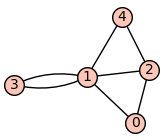

64

In [28]:
## Testing the function
G0=Graph({0: [1,2], 1:[0,2], 3:[1,1], 4:[2,1]})
G0.show(figsize=2)
NbClosedWalk(G0,4)

## <font color=green>Exercise 12</font> <a class = "anchor" id="exercise-12"></a> 

Random walk on the graph you defined in [Exercise 11](#exercise-11)

Suppose there is a robot standing on one of the vertices of the graph that you defined in [Exercise 11](#exercise-11). This position can be chosen randomly. Write a Python function named `random_walk_on_graph` that takes a positive integer as input — representing the number of walks the robot makes on the vertices of your graph — and returns a table that records the number of times the robot visited each vertex in your graph. What is the position of the robot at the $100$-th step? What can you observe about the tabulated data? 

**Hint**: Read the help documentation on the _SageMath_ functions `choice` and `table`. You may need them in your code. What did you observe from the tabulated data?
